<a href="https://colab.research.google.com/github/gitmystuff/DTSC5810/blob/main/Week_07-Predictive_Analytics/Linear_Regression_with_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Feature Engineering

## Linear Regression

* Linear regression is a statistical model which estimates the linear relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.

https://en.wikipedia.org/wiki/Linear_regression

### Slope Intercept Equation (Coordinate Geometry)

* $y = mx + b$
* $m = \frac{y_2-y_1}{x_2-x_1} = \frac{\Delta y}{\Delta x} = \frac{dy}{dx}$ (1)
* $m = \frac{N * \sum{(xy)} - \sum{x}\sum{y}}{N * \sum{x^2} - (\sum{x})^2}$
* $b = \frac{\sum{y} - m * \sum{x}}{N}

(1) the latter is Leibniz's notation - https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-1-new/ab-2-1/a/derivative-notation-review

In [46]:
# https://www.mathsisfun.com/data/least-squares-regression.html
import numpy as np
import pandas as pd

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

def xy(r):
    return r.x * r.y

m_table = pd.DataFrame({'x': x, 'y': y})
m_table['x^2'] = m_table['x'].apply(lambda x: x**2)
m_table['xy'] = m_table.apply(xy, axis=1)
print(m_table.head())

N = len(x)
sums = list(m_table.sum())
print(sums)
m = (N * sums[3] - sums[0] * sums[1]) / (N * sums[2] - sums[0]**2)
print('m:', m)
b = (sums[1]-m*sums[0])/N
print('b:', b)

   x  y  x^2  xy
0  1  1    1   1
1  2  3    4   6
2  3  2    9   6
3  4  3   16  12
4  5  5   25  25
[15, 14, 55, 50]
m: 0.8
b: 0.4


### Simple Linear Regression

In the context of regression analysis, 'a' and 'b' are not necessarily the same as 'm' and 'b' in the coordinate geometry. They are regression coefficients that are based on data. The regression line aims to capture the relationship in the data, while the 'm' and 'b' represent a straight line in a geometric sense. One represents an exact equation of a straight line, whereas the other is estimates based on data. I would say that's a good reason for the different use of variables.

* $y_i = \beta_0 + \beta_1 x_i + \epsilon_i$
* $y = \beta_0 + \beta_1 x$

The coefficients for linear regression, that we are estimating, are $\beta_0$ and $\beta_1$. The error term, $e$, represents the rest of $y$ that $X$ cannot explain. If we look at $y = f(X) + e$ and assume that the function of $e$ is iid, then the sum of $e$ will be zero and is usually left off of the equation.

The sum of the residuals always equals zero (assuming that your line is actually the line of 'best fit...' The mean of residuals is also equal to zero, as the mean = the sum of the residuals / the number of items. The sum is zero, so 0/n will always equal zero.

Stephanie Glen. "Residual Values (Residuals) in Regression Analysis" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/residual/

* $\hat{\beta_0} = \bar{y} - (\hat{\beta_1}\bar{x})$
* $\hat{\beta_1} = \frac{\sum^N_{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sum^N_{i=1}(x_i - \bar{x})^2}$
* $ = \frac{s_{xy}}{s^2_x}$
* $ = r_{xy}\frac{s_y}{s_x}$
* $ r_{xy} = \frac{cov(x,y)}{\sigma_x\sigma_y} = \frac{\frac{1}{N}\sum(x-\bar{x})(y-\bar{y})}{\sqrt\frac{\sum(x-\bar{x})^2}{N}\sqrt\frac{\sum(y-\bar{y})^2}{N}}  = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2}\sqrt{\sum(y-\bar{y})^2}}$

where

* $\bar{x}$ and $\bar{y}$ as the average of $x_i$ and $y_i$, respectively
* $r_{xy}$ is the **sample correlation coefficient** between x and y
* $s_x$ and $s_y$ is the **uncorrected sample standard deviations** of x and y
* $s_{x}^2$ and $s_{x,y}$ is the **sample variance** and **sample covariance**, respectively

**Sample Correlation Coefficient**: In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. Although in the broadest sense, "correlation" may indicate any type of association, in statistics it normally refers to the degree to which a pair of variables are linearly related. The sample correlation coefficient can be used to estimate the population Pearson correlation

https://en.wikipedia.org/wiki/Correlation#Sample_correlation_coefficient

**Uncorrected Sample Standard Deviation**: In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range. The formula for the population standard deviation (of a finite population) can be applied to the sample, using the size of the sample as the size of the population (though the actual population size from which the sample is drawn may be much larger). This estimator, denoted by sN, is known as the uncorrected sample standard deviation, or sometimes the standard deviation of the sample (considered as the entire population), and is defined as follows:

$s_N = \sqrt{\frac{1}{N}\sum{(x-\bar{x})^2}}$

https://en.wikipedia.org/wiki/Standard_deviation#Uncorrected_sample_standard_deviation

### Residuals

https://www.statology.org/residual-sum-of-squares-in-excel/

### Bias

According to Wikipedia (2022):

In statistics, Bessel's correction is the use of n − 1 instead of n in the formula for the sample variance and sample standard deviation, where n is the number of observations in a sample. This method corrects the bias in the estimation of the population variance. It also partially corrects the bias in the estimation of the population standard deviation. However, the correction often increases the mean squared error in these estimations. This technique is named after Friedrich Bessel (para 1).

Bessel's correction. (June 13, 2022). In *Wikipedia*. https://en.wikipedia.org/wiki/Bessel%27s_correction

* What is bias? https://stats.libretexts.org/Bookshelves/Applied_Statistics/Book%3A_Answering_Questions_with_Data_-__Introductory_Statistics_for_Psychology_Students_(Crump)/04%3A_Probability_Sampling_and_Estimation/4.13%3A_Estimating_population_parameters
* What are degrees of freedom? https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/degrees-of-freedom/

### Biased

**Standard Deviation of the Population**: $\sigma = \sqrt{\frac{1}{N}\sum(x-\bar{x})^2}$

**Uncorrected Sample Standard Deviation**: $sN = \sqrt{\frac{1}{N}\sum(x-\bar{x})^2}$

### Unbiased

**Standard Deviation of the Sample**: $s = \sqrt{\frac{1}{n-1}\sum(x-\bar{x})^2}$

**SEE BESSEL'S CORRECTION**

## Multiple Linear Regression

https://www.investopedia.com/terms/m/mlr.asp

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 ... + \beta_n x_n + \epsilon$

where:
* y = dependent variable
* x = explanatory  variable
* $\beta_0$ = intercept
* $\beta_n$ = slope coefficients
* $\epsilon$ = the model's error term

### Confounding Variables

* https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_multivariable/bs704_multivariable7.html

### Closed Form

* http://faculty.cas.usf.edu/mbrannick/regression/Part3/Reg2.html

### Assumptions of Linear Regression

* Linearity: There is a linear relationship between the independent variable and the dependent variable
* No Multicollinearity: Features should not be highly correlated
* Normality: The residuals are normally distributed
* Homoscedasticity: The residuals have an even distribution around the mean and across the spread
* Independence: There is no correlation between residuals; there is no trend, no pattern, no structure in residuals
* Time series may violate independence
* Elements that are randomly assigned to features may violate independence
* All relevant explanatory variables must be used
* Features cannot be correlated with error term

Become familiar with the plots provided in the following links:
* https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/
* https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html

### Linear Algebra

* $y_i = \theta^TX_i + \epsilon_i$
* $h_\theta(x) = \theta_0 + \theta_1x_1$
* $\theta = (X^T * X)^{-1} * X^T * y$
* Dot product - https://en.wikipedia.org/wiki/Dot_product
* Inverse - https://www.mathsisfun.com/algebra/matrix-inverse.html
* To multiply an m×n matrix by an n×p matrix, the ns must be the same,
and the result is an m×p matrix.

https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57


### Matrix Multiplication

In mathematics, particularly in linear algebra, matrix multiplication is a binary operation that produces a matrix from two matrices. For matrix multiplication, the number of columns in the first matrix must be equal to the number of rows in the second matrix. The resulting matrix, known as the matrix product, has the number of rows of the first and the number of columns of the second matrix. The product of matrices A and B is denoted as AB.

https://en.wikipedia.org/wiki/Matrix_multiplication

m = rows; n = columns; (m, n) can be multiplied with another (m, n) if n from first matrix is equal to m for second matrix

### Why Matrix Multiplication?

Linear algebra is often used in data science / machine learning which includes matrix multiplication. To stay within the scope of this course we will simply say that because of the large number of features that X can potentially represent, it is more efficient to use matrix multiplication.

Because matrix multiplication is such a central operation in many numerical algorithms, much work has been invested in making matrix multiplication algorithms efficient. Applications of matrix multiplication in computational problems are found in many fields including scientific computing and pattern recognition and in seemingly unrelated problems such as counting the paths through a graph.

https://en.wikipedia.org/wiki/Matrix_multiplication_algorithm

Please review the following links to learn more:

* https://en.wikipedia.org/wiki/Linear_algebra
* https://online.stat.psu.edu/stat462/node/132/
* https://www.mathsisfun.com/algebra/matrix-multiplying.html

### The Derivative

The derivative is a fundamental tool of calculus that quantifies the sensitivity of change of a function's output with respect to its input. The derivative of a function of a single variable at a chosen input value, when it exists, is the slope of the tangent line to the graph of the function at that point. The tangent line is the best linear approximation of the function near that input value. For this reason, the derivative is often described as the instantaneous rate of change, the ratio of the instantaneous change in the dependent variable to that of the independent variable. The process of finding a derivative is called differentiation.

https://en.wikipedia.org/wiki/Derivative

A partial derivative of a function of several variables is its derivative with respect to one of those variables, with the others held constant (as opposed to the total derivative, in which all variables are allowed to vary). Partial derivatives are used in vector calculus and differential geometry.

https://en.wikipedia.org/wiki/Partial_derivative

* We find the derivative of a function using the Power Rule
* The derivative of $f(x) = x^2$ is $f'(x) = 2x$
* The partial derivative of $f(x, y) = x^2 + y^3$ is $f'(x) = 2x + 0 = 2x$
* In this case we find the partial derivative with respect to x and hold y as a constant
* The derivative of a constant is 0

https://www.mathsisfun.com/calculus/derivatives-partial.html

* **Gradient Descent**

## Feature Engineering

Feature Engineering is the process of extracting and organizing the important features from raw data in such a way that it fits the purpose of the analysis being used, or the model being used.

* Understanding Data Types (DTypes)
* Missing Data Imputation
* Categorical Encoding
* Variable Transformation
* Discretization
* Outlier Engineering
* Feature Scaling
* Date Time Engineering

https://joss.theoj.org/papers/10.21105/joss.03642.pdf

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/house-prices.csv')
print(df.shape)
print(df.info())
df.head()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# idendify categorical, continuous, discrete, and temporal data
categorical = [feat for feat in df.select_dtypes(include=['object']).columns]
numerical = df.select_dtypes(include=['int64', 'float64']).columns
temporal = [feat for feat in numerical if 'Yr' in feat or 'Year' in feat]
continuous = [feat for feat in numerical if feat not in temporal and feat not in ['Id', 'SalePrice']]
discrete = [feat for feat in continuous if len(df[feat].unique()) < 20]
continuous = [feat for feat in continuous if feat not in discrete]

print(f'Categorical Features: {len(categorical)}, {categorical}')
print(f'Numerical Features: {len(continuous)}, {continuous}')
print(f'Temporal Features: {len(temporal)}, {temporal}')
print(f'Discrete Features: {len(discrete)}, {discrete}')

Categorical Features: 43, ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical Features: 18, ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']
Temporal Features: 4, ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
Discrete Features: 14, ['MSSubClass', 'Overa

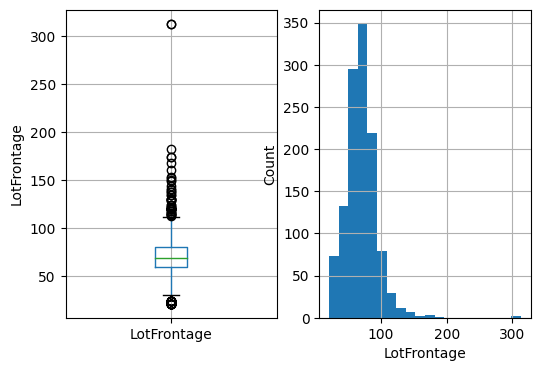

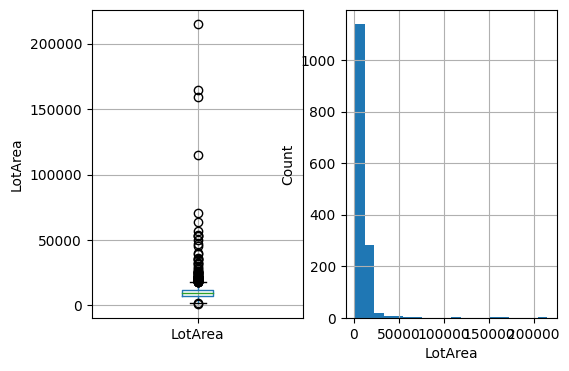

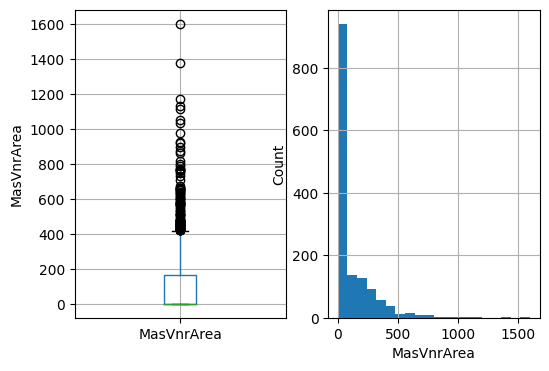

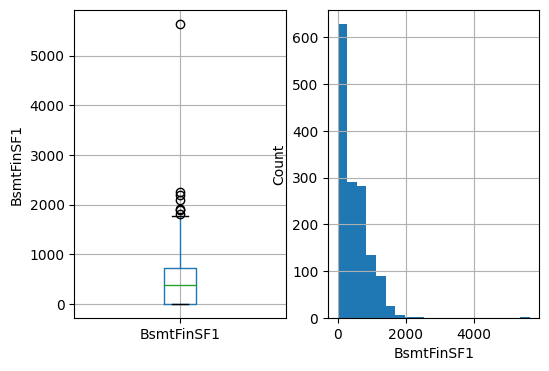

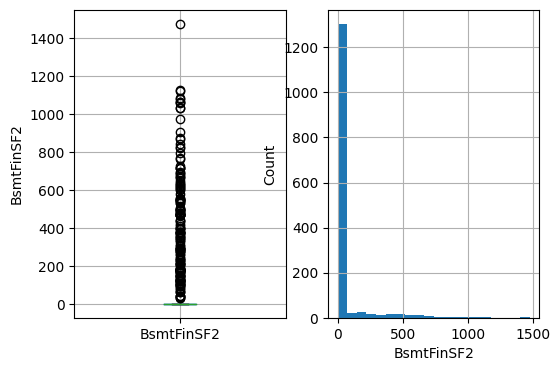

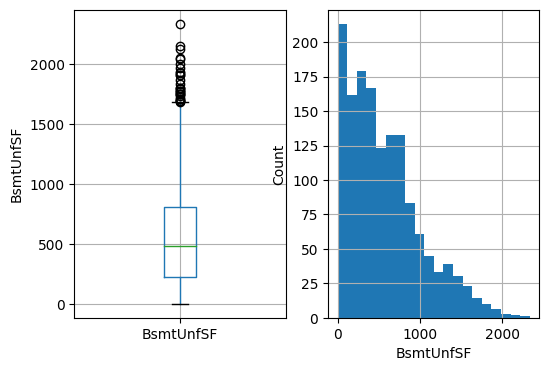

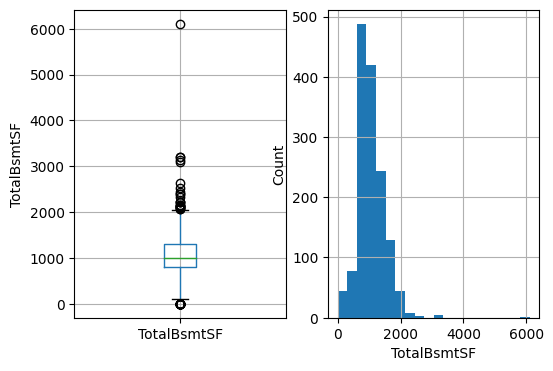

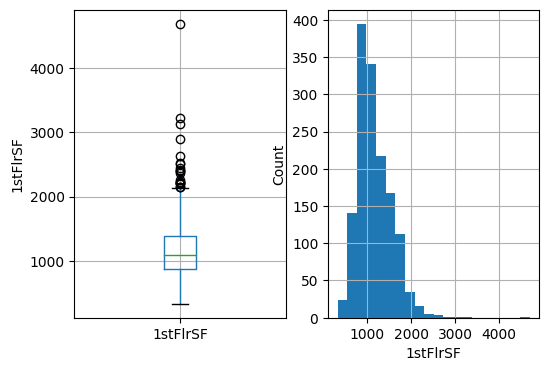

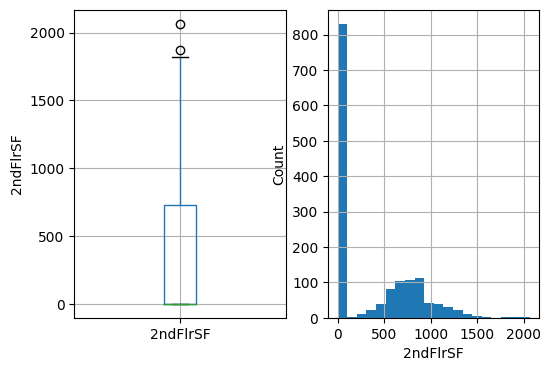

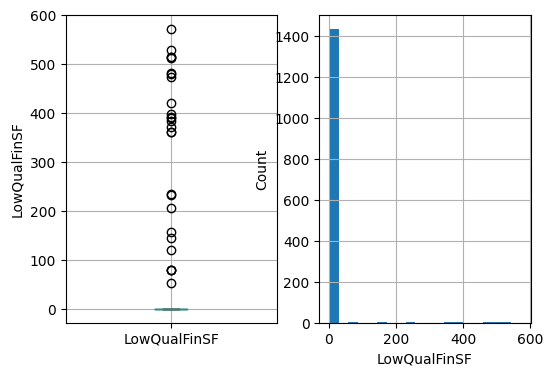

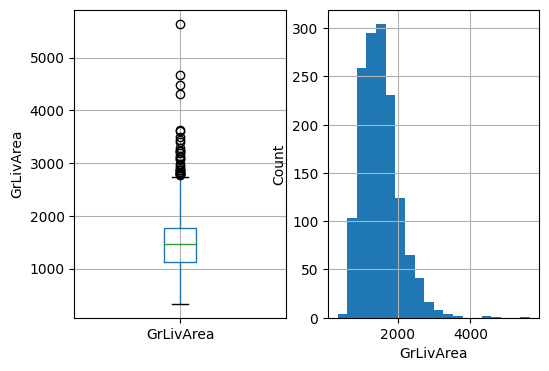

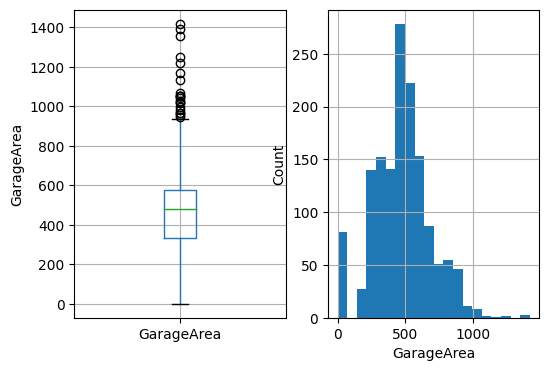

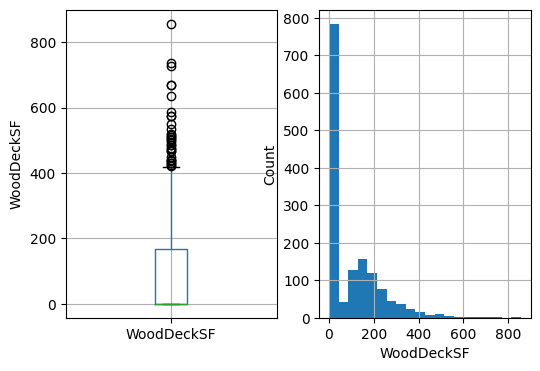

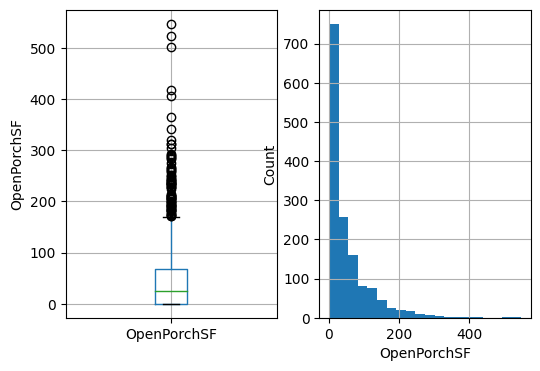

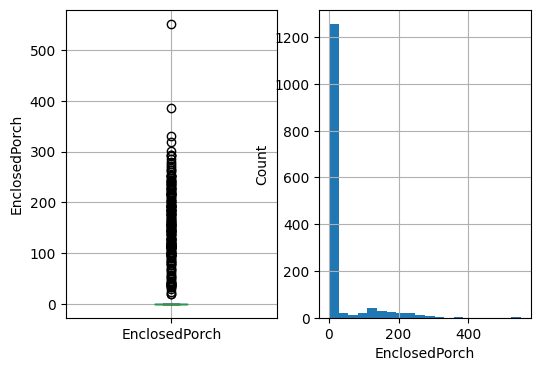

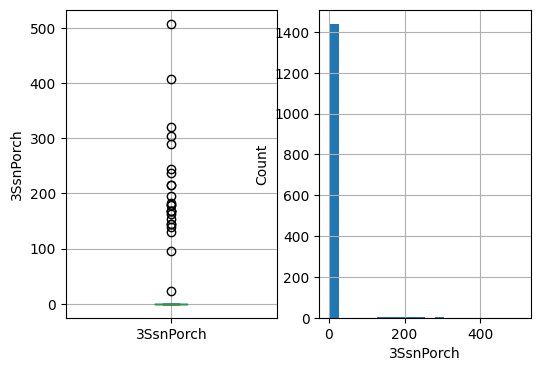

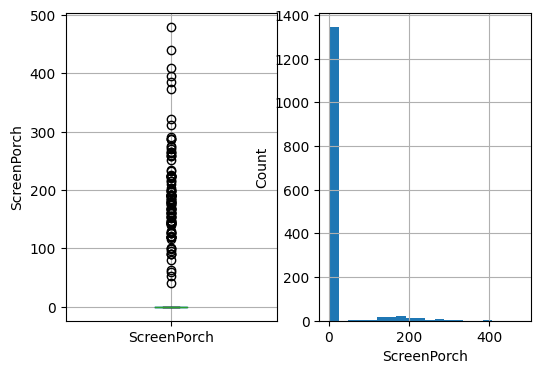

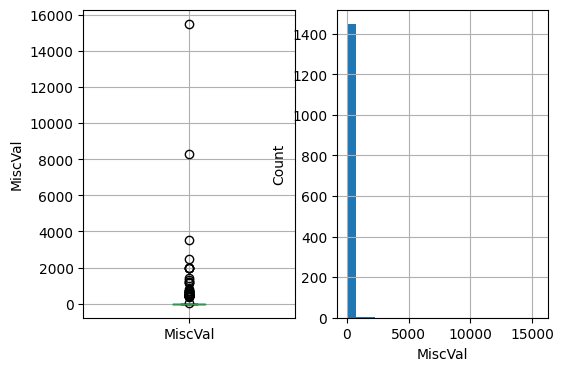

In [ ]:
# outliers
import matplotlib.pyplot as plt

for feat in continuous:
  plt.figure(figsize=(6, 4))
  plt.subplot(1, 2, 1)
  fig = df.boxplot(column=feat)
  fig.set_title('')
  fig.set_ylabel(feat)

  plt.subplot(1, 2, 2)
  fig = df[feat].hist(bins=20)
  fig.set_ylabel('Count')
  fig.set_xlabel(feat)

  plt.show()

The majority of continuous variables have outliers and distributions that are not normal which will cause problems in our linear analysis.

In [ ]:
# discrete variables can be engineered as nominal categorical data
df[discrete] = df[discrete].astype('O')
print(discrete)
df[discrete].info()

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   object
 1   OverallQual   1460 non-null   object
 2   OverallCond   1460 non-null   object
 3   BsmtFullBath  1460 non-null   object
 4   BsmtHalfBath  1460 non-null   object
 5   FullBath      1460 non-null   object
 6   HalfBath      1460 non-null   object
 7   BedroomAbvGr  1460 non-null   object
 8   KitchenAbvGr  1460 non-null   object
 9   TotRmsAbvGrd  1460 non-null   object
 10  Fireplaces    1460 non-null   object
 11  GarageCars    1460 non-null   object
 12  PoolArea      1460 non-null   object
 13  MoSold        1460 non-null   object
dtypes: object(14)
mem

In [ ]:
# engineer features with year and remember to drop year sold since it's redundant
def years_goneby(df, feat):
  df[feat] = df['YrSold'] - df[feat]
  return df

for feat in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
  df = years_goneby(df, feat)

df[temporal].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


In [ ]:
!git clone https://github.com/gitmystuff/preppy.git

Cloning into 'preppy'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 52 (delta 23), reused 19 (delta 8), pack-reused 0
Receiving objects: 100% (52/52), 21.79 KiB | 7.26 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
from preppy.version import __version__

print(__version__)

PrepPy Version: 0.1.0


In [ ]:
# identify_consts
import preppy.utils as utils

consts = utils.functions.identify_consts(df)
consts

[]

In [ ]:
quasi_consts = utils.functions.identify_quasi_consts(df)
quasi_consts

['Street', 'Utilities']

In [ ]:
df.drop(quasi_consts, axis=1, inplace=True)
print(df.shape)

(1460, 79)


In [ ]:
utils.functions.check_row_duplicates(df)

0

In [ ]:
duplicate_features = utils.functions.check_col_duplicates(df)
print(duplicate_features)

[]


In [ ]:
df[continuous].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,43.489041
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,496.123024
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[continuous] = scaler.fit_transform(df[continuous])
df[continuous].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,0.150685,0.033420,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0
1,0.202055,0.038795,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0
2,0.160959,0.046507,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0
3,0.133562,0.038561,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0
4,0.215753,0.060576,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0


In [ ]:
for feat in df.columns:
  if df[feat].isnull().sum() > 0:
    print(feat, df[feat].isnull().mean())


LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.5972602739726027
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [ ]:
for feat in df.columns:
  if df[feat].isnull().mean() > .5:
    print(feat, df[feat].isnull().mean())

missing_too_much_data = [feat for feat in df.columns if df[feat].isnull().mean() > .5]
print(missing_too_much_data)

Alley 0.9376712328767123
MasVnrType 0.5972602739726027
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137
['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


In [ ]:
df.drop(missing_too_much_data, axis=1, inplace=True)
print(df.shape)

(1460, 74)


In [ ]:
df = utils.functions.handle_missing_values(df)
for feat in df.columns:
  if df[feat].isnull().sum() > 0:
    print(feat, df[feat].isnull().mean())

print(df.shape)
df.dropna(inplace=True)
print(df.shape)

Electrical 0.0006849315068493151
(1460, 74)
(1459, 74)


In [ ]:
df = utils.functions.handle_outliers(df)

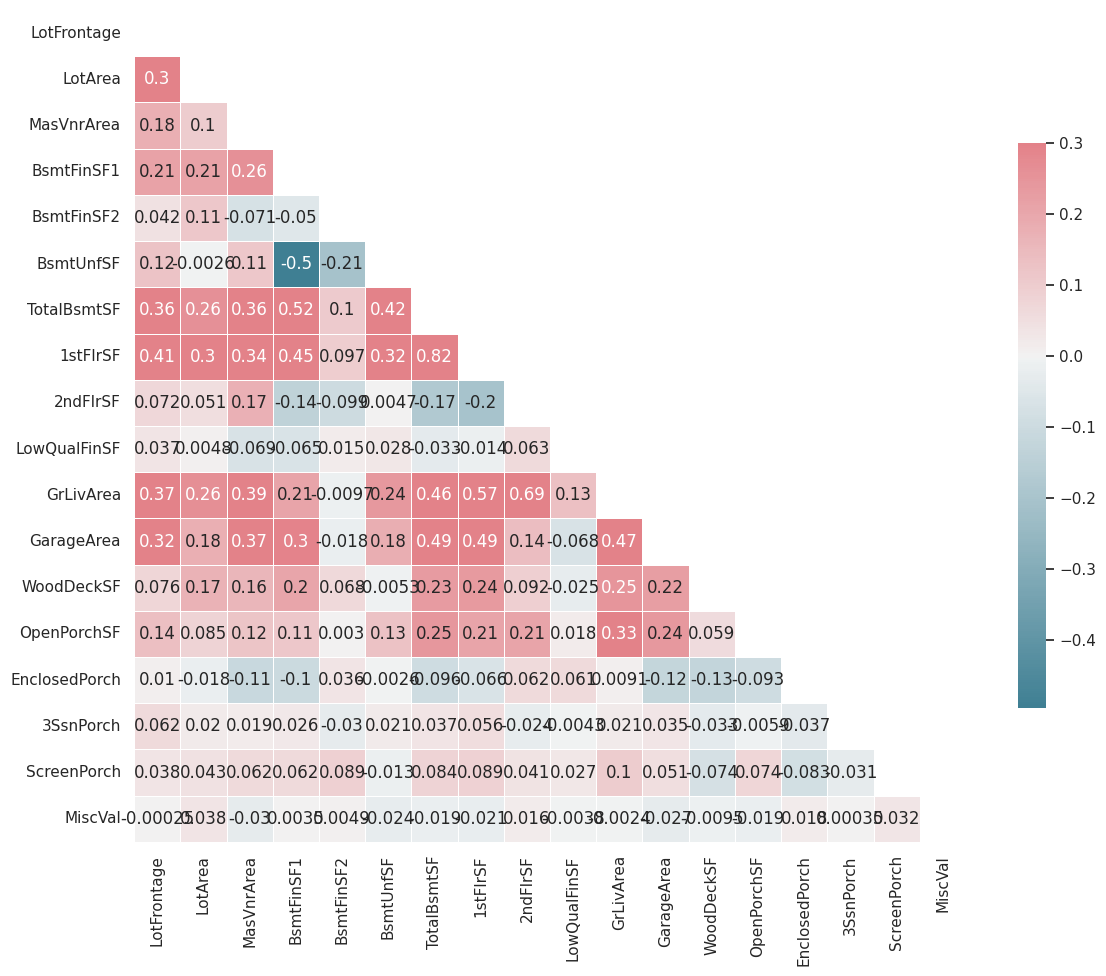

In [ ]:
# correlation heat map
import numpy as np
import seaborn as sns
from scipy import stats

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = df[continuous].corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(12, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [ ]:
df = utils.functions.do_OHE(df)
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(1459, 131)
(1458, 131)


## Model Building and Evaluation

### Linear Regression

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice', 'Id', 'YrSold']),
                                                    df['SalePrice'],
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape

((1166, 128), (292, 128))

In [ ]:
# create and train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# test set prediction results
predictions = model.predict(X_test)
print(r2_score(y_test, predictions))

0.8015141962263135


### R-squared

* $RSS = SS_{res} = \sum{(y - \hat{y})^2}$
* $TSS = SS_{tot} = \sum{(y - \bar{y})^2}$
* $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable(s).

https://en.wikipedia.org/wiki/Coefficient_of_determination

In statistics, the Pearson correlation coefficient ― also known as Pearson's r ― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationship or correlation. As a simple example, one would expect the age and height of a sample of teenagers from a high school to have a Pearson correlation coefficient significantly greater than 0, but less than 1 (as 1 would represent an unrealistically perfect correlation).

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

* r shows correlation between x and y
* r squared shows strength of model, the proportion of the variance y that can be explained by X in a linear regression model

Cases where r-squared is $R^2$

* In simple linear regression (1 feature and 1 target)
* r identifies patterns / relationships
* $R^2$ identifies strength of model (low $R^2$ is not necessarily a bad thing as it is data model related)
* r is useless for evaluating predictions

Cases where pearson's r-squared is not $R^2$

* Try to distinguish between Pearson's r, correlation coefficient, and $R^2$, correlation of determination

#### R Squared, R, and r

* R-Squared: Coefficient of Determination, proportion of the variation in the dependent variable that is predictable from the independent variable(s)
* R: Coefficient of multiple correlation, a measure of how well a given variable can be predicted using a linear function of a set of other variables
* r: Pearson's r, correlation is different from regression, as it does not assume any sort of dependency between two quantitative variables and it is only meant to express their joint variability
* https://www.r-bloggers.com/2022/11/the-coefficient-of-determination-is-it-the-r-squared-or-r-squared/

### Ordinary Least Squares

In [ ]:
import statsmodels.api as sm

# what ever we do for X_train, do for X_test
X_train.insert(0, 'const', 1)
X_test.insert(0, 'const', 1)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     51.61
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:26:09   Log-Likelihood:                -425.04
No. Observations:                1166   AIC:                             1100.
Df Residuals:                    1041   BIC:                             1733.
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9827      0.466     -2.109      0.035      -1.897      -0.068
MSSubClass            0.0633      0.168      0.378      0.706      -0.266       0.392
LotFrontage          -0.5086      0.226     -2.247      0.025      -0.953      -0.065
LotArea               0.7271      0.368      1.975      0.049       0.005       1.450
Neighborhood         -1.1004      0.308     -3.577      0.000      -1.704      -0.497
Condition1            0.1355      0.043      3.186      0.001       0.052       0.219
Condition2            0.5702      0.139      4.101      0.000       0.297       0.843
HouseStyle           -0.0325      0.117     -0.276      0.782      -0.263       0.198
OverallQual          -0.7997      0.190     -4.211      0.000      -1.172      -0.427
OverallCond          -0.1551      0.072     -2.165      0.031      -0.296      -0.014
YearBuilt            -0.0038      0.001     -3.625      0.000      -0.006      -0.002
YearRemodAdd         -0.0042      0.001     -4.800      0.000      -0.006      -0.002
RoofStyle            -0.0498      0.052     -0.966      0.334      -0.151       0.051
RoofMatl              0.0632      0.115      0.549      0.583      -0.163       0.289
Exterior1st           0.1207      0.307      0.394      0.694      -0.481       0.722
Exterior2nd          -0.0003      0.304     -0.001      0.999      -0.597       0.596
MasVnrArea            0.2315      0.133      1.735      0.083      -0.030       0.493
Foundation            0.0543      0.130      0.417      0.677      -0.201       0.310
BsmtFinType1          0.1286      0.162      0.792      0.428      -0.190       0.447
BsmtFinSF1            0.5949      0.192      3.100      0.002       0.218       0.971
BsmtFinType2          0.0953      0.076      1.247      0.213      -0.055       0.245
BsmtFinSF2            0.3834      0.188      2.035      0.042       0.014       0.753
BsmtUnfSF            -0.0641      0.085     -0.752      0.452      -0.232       0.103
TotalBsmtSF           0.6175      0.198      3.113      0.002       0.228       1.007
Heating              -0.0062      0.097     -0.064      0.949      -0.196       0.184
CentralAir           -0.0787      0.064     -1.234      0.217      -0.204       0.046
1stFlrSF              2.0538      0.196     10.452      0.000       1.668       2.439
2ndFlrSF              0.7613      0.098      7.773      0.000       0.569       0.954
LowQualFinSF          0.1927      0.150      1.285      0.199      -0.101       0.487
GrLivArea             2.0032      0.150     13.340      0.000       1.709       2.298
BedroomAbvGr         -0.1039      0.076     -1.360      0.174      -0.254       0.046
TotRmsAbvGrd         -0.0194      0.177     -0.109      0.913      -0.368       0.329
Functional            0.3114      0.056      5.609      0.000       0.202

### OLS Regression Summary Explanation

* Endog(enous): Similar to the dependent variable
* Exog(enous): Similar to the independent variable
* https://www.statisticshowto.com/endogenous-variable/
* https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

### Model Info
* Dep. Varialble: the response variable, dependent, outcome, etc.
* Model: what model are we using (ordinary least squares) for the training
* Method: how the parameters (coefficients) were calculated
* No. Observations: the number of observations, rows... (n)
* DF Residuals: degrees of freedom of the residuals
* DF Model: number of parameters in the model excluding the constant if present
* Covariance Type: deals with violations of assumptions

### Goodness of Fit
* R-Squared: coefficient of determination, how well the regression fits the data
* Adj R-Squared: R-squared adjustment based on number of parameters and df residuals
* F statistic: a measure of how significant the fit is
* Prop F statistic: the probability that you would get the F stat given the null hypothesis
* Log-Liklihood: can be used to compare the fit of different coefficients, the higher valur is better
* AIC: Akaike Information Criterion is used to compare models, a lower score is better (doesn't address features, just the overall model)
* BIC: Bayesian Information Criterion is similar to AIC but uses a higher penalty

### Coefficients
* coef: the estimated value of the coefficient
* std error: the basic standard error of the estimate of the coefficient
* t: the t-statistic value, how significant the coefficient is
* P>|t|: the p-value, indicates a statistically significant relationship to the dependent variable if less than the confidence level, usually 0.05
* 95% confidence interval: the lower and upper values

### Statistical Tests
* Skewness: A measure of the symmetry of the data about the mean
* Kurtosis: A measure of the shape of the data
* Omnibus: D'Angostino's test provides a combined test for the presence of skewness and kurtosis
* Prob(Omnibus): probability of Omnibus
* Jarque-Bera: Another test for skewness and kurtosis
* Prob(Jarque-Bera): probability of Jarque-Bera
* Durbin-Watson: A test for the presence of autocorrelation, if the errors aren't independent
* Cond No: A test for multicollinearity